### Name : Anjana Tissera
### ID : st123459

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. ETL

## Load the data and preview

In [87]:
df = pd.read_csv('chocolate_bars.csv')
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [4]:
print(f"Dataframe shape: {df.shape}\n")
print(f"Columns: {df.columns}\n")


Dataframe shape: (2530, 11)

Columns: Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')



## 2.EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [6]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


## Univariate analysis
- In this step discreate variables will be analyzed using countplot
- And continuous variables will be analyzed using distplot

In [7]:
# Examining the id column

n = len(pd.unique(df['id']))
print(f"Number of unique valus in column 'id' {n}")

Number of unique valus in column 'id' 630


In [14]:
#discrete column
dis_col = df.select_dtypes(include=['object']).columns
#continuous column
cont_col = df.select_dtypes(include=['int64', 'float64']).columns

dis_col,con_col

(Index(['manufacturer', 'company_location', 'bean_origin', 'bar_name',
        'ingredients', 'review'],
       dtype='object'),
 Index(['id', 'year_reviewed', 'cocoa_percent', 'num_ingredients', 'rating'], dtype='object'))

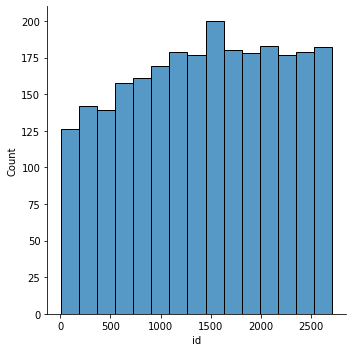

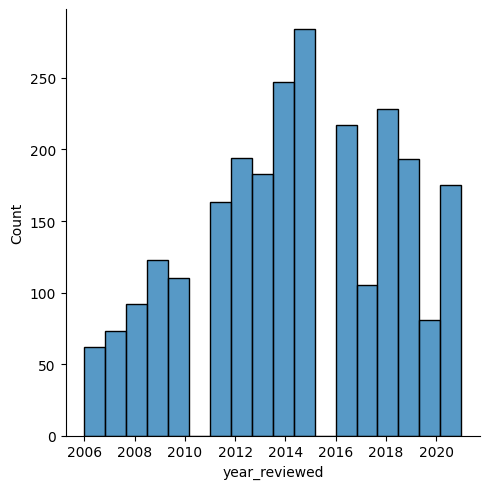

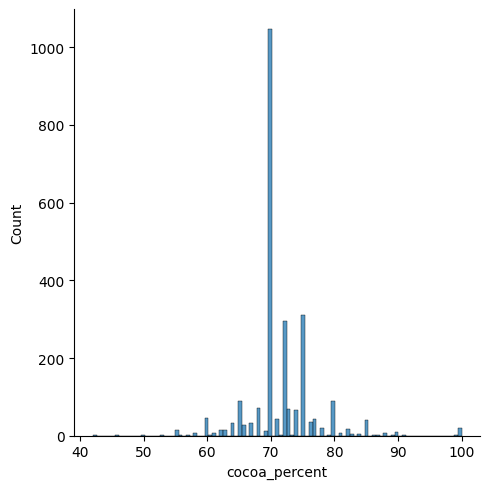

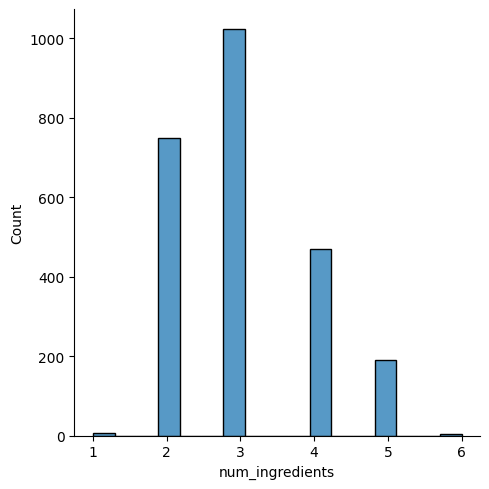

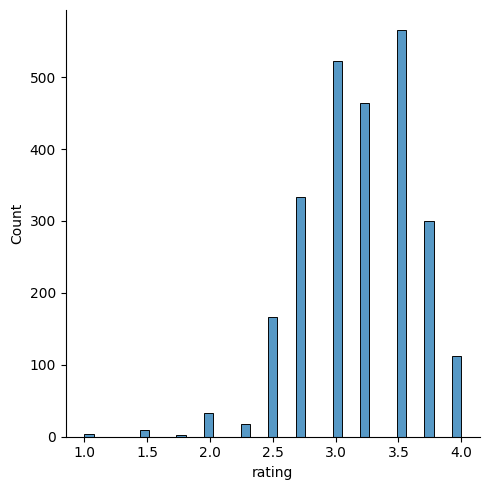

In [15]:
for col in cont_col:
    sns.displot(data=df, x=col)
    plt.show()

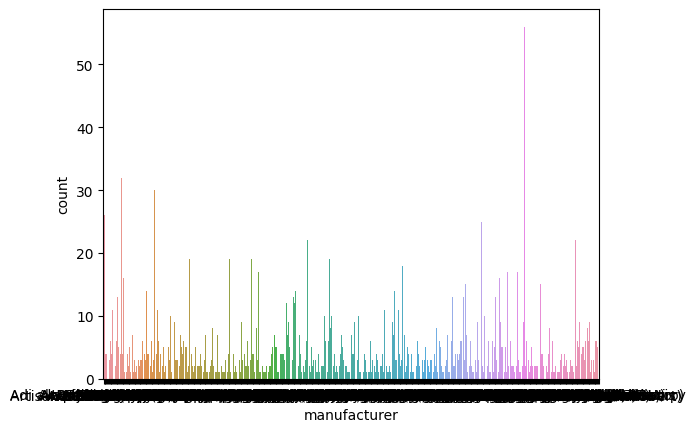

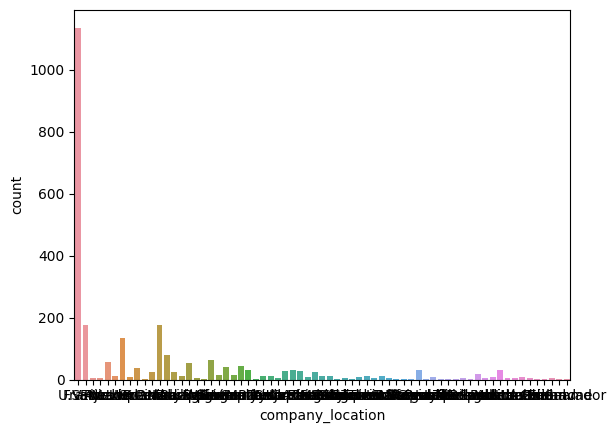

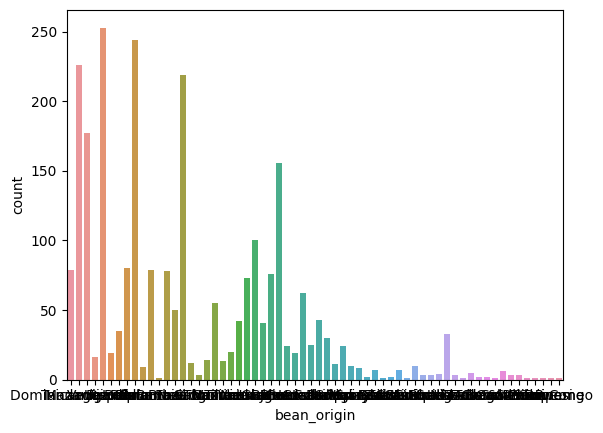

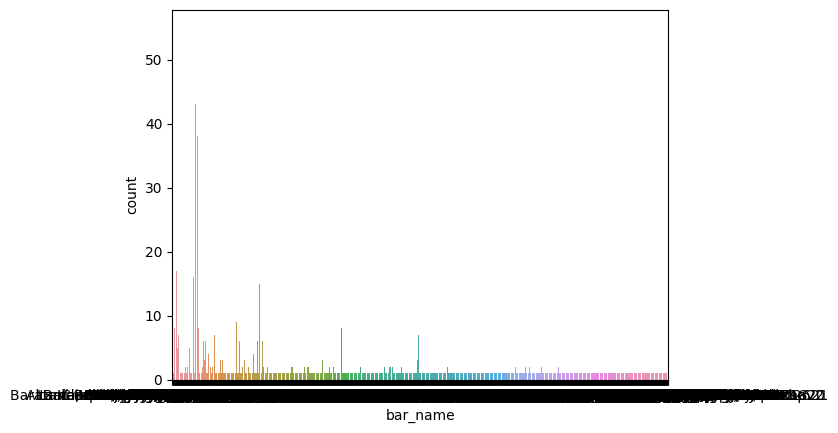

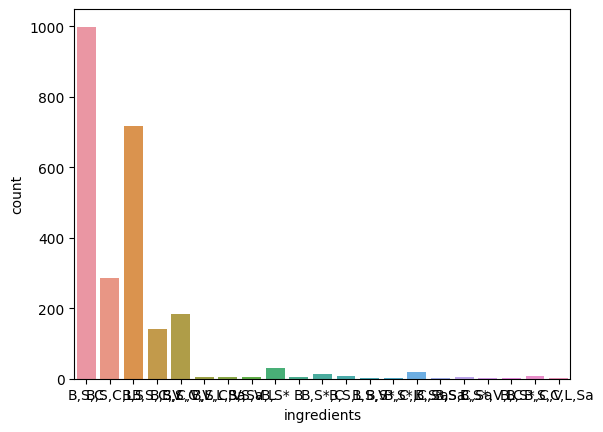

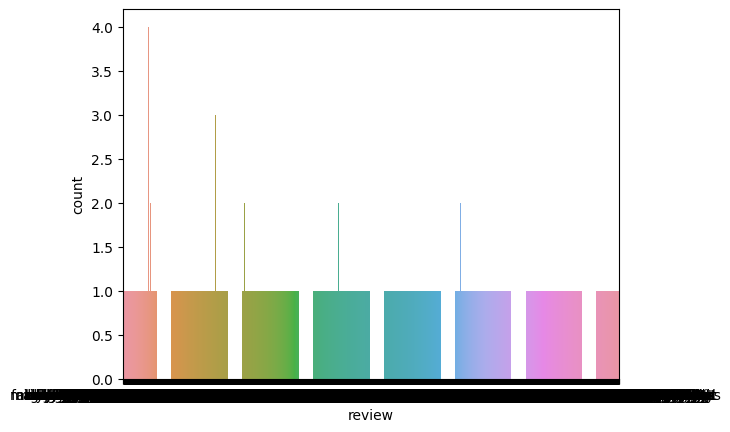

In [17]:
for col in dis_col:
    sns.countplot(data = df, x=col)
    plt.show()

### Pairplot analysis

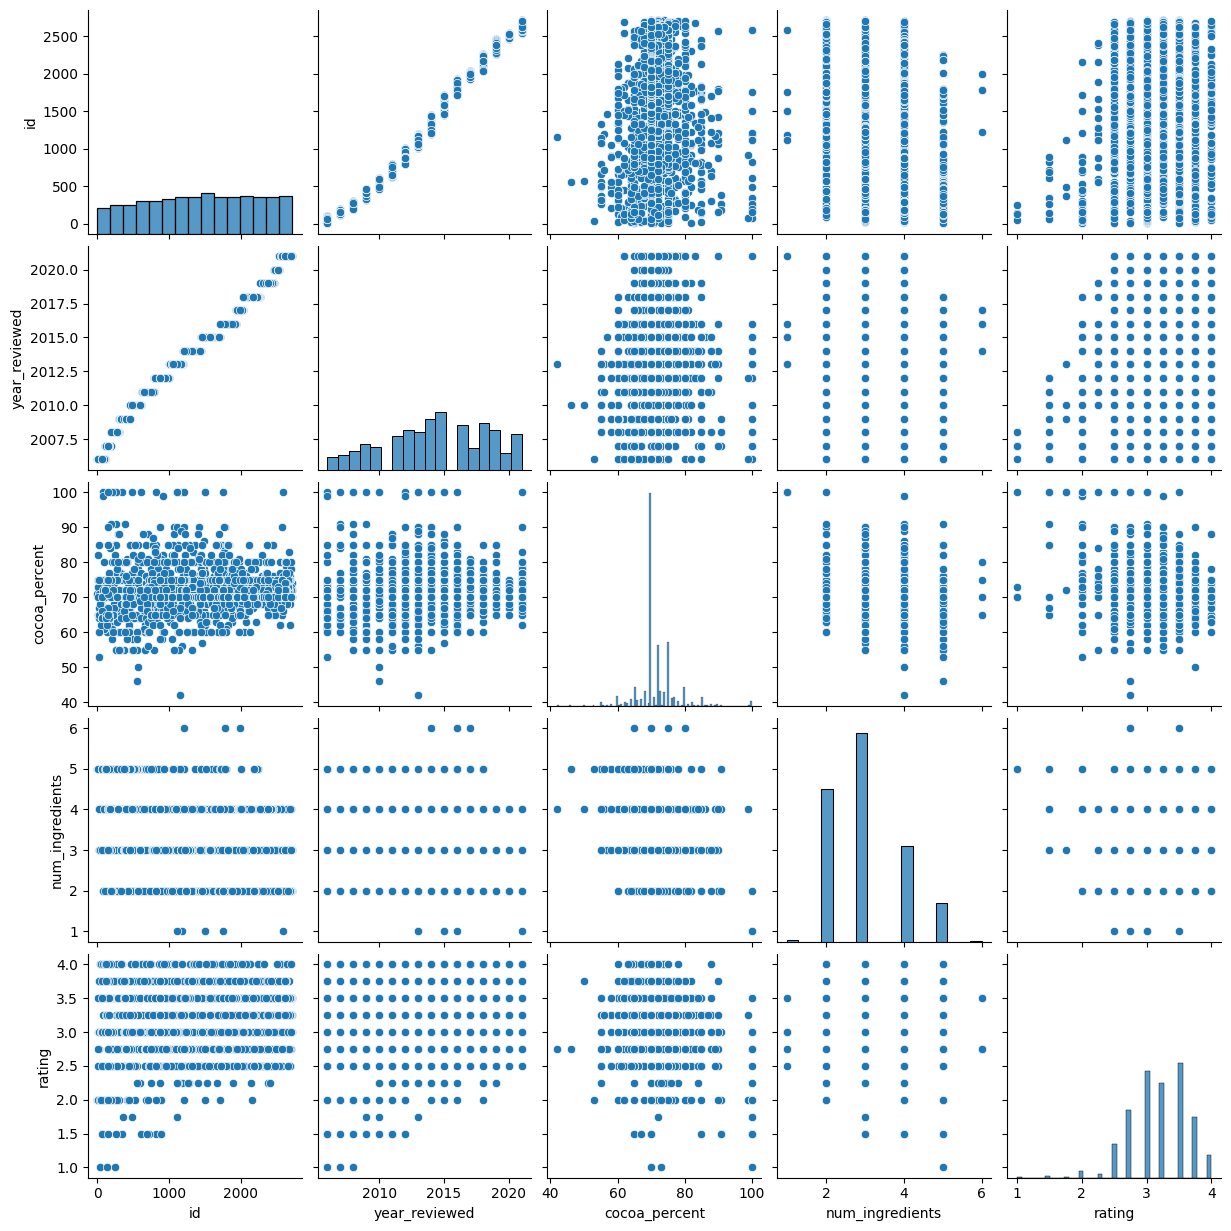

In [18]:
sns.pairplot(df)
plt.show()

### Note: From the pairplot it can be seen that `rating` is related to `cocoa_percent`

### 2.2 Multivariate analysis
- In this step relationship between rating(dependent variable) and other variables(independent variables) will be examined
- In the case of discrete features, relationship will be visualized using boxplots
- In the case of continous features, relationship will be visualized using scatterplots
- Further heatmap will be used to identify correlations between variables

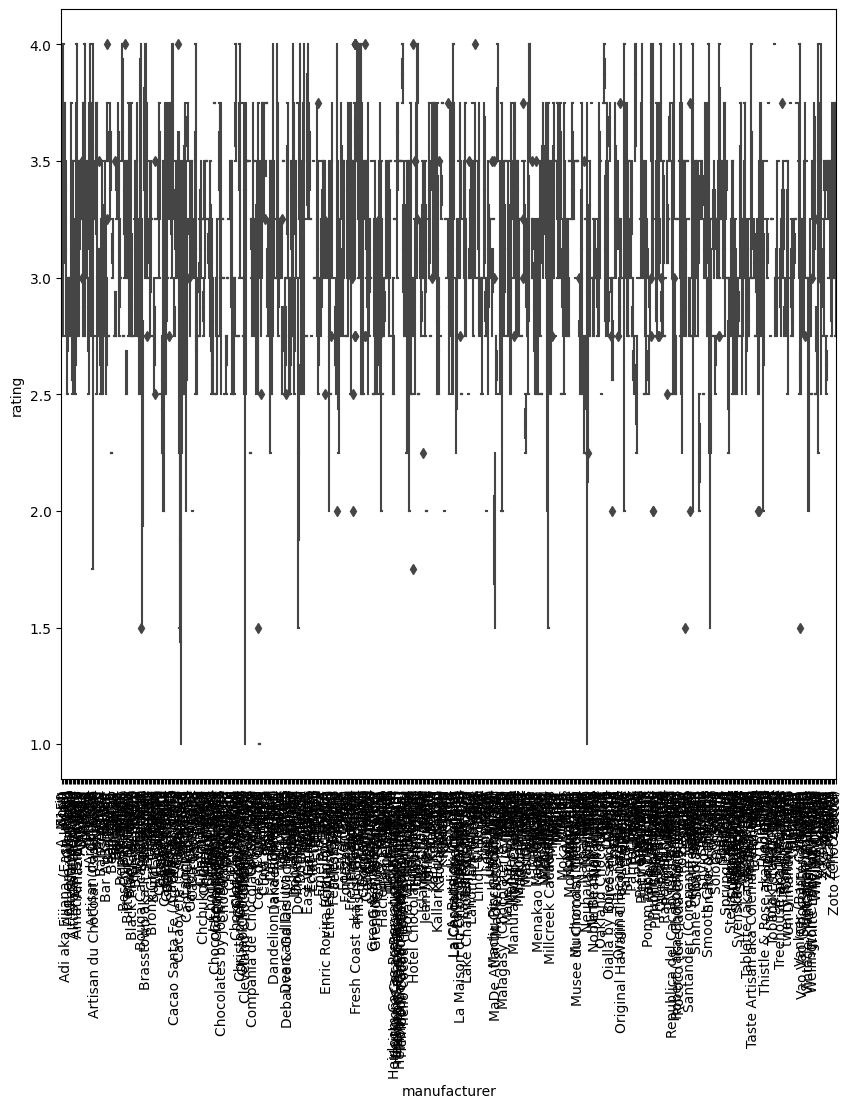

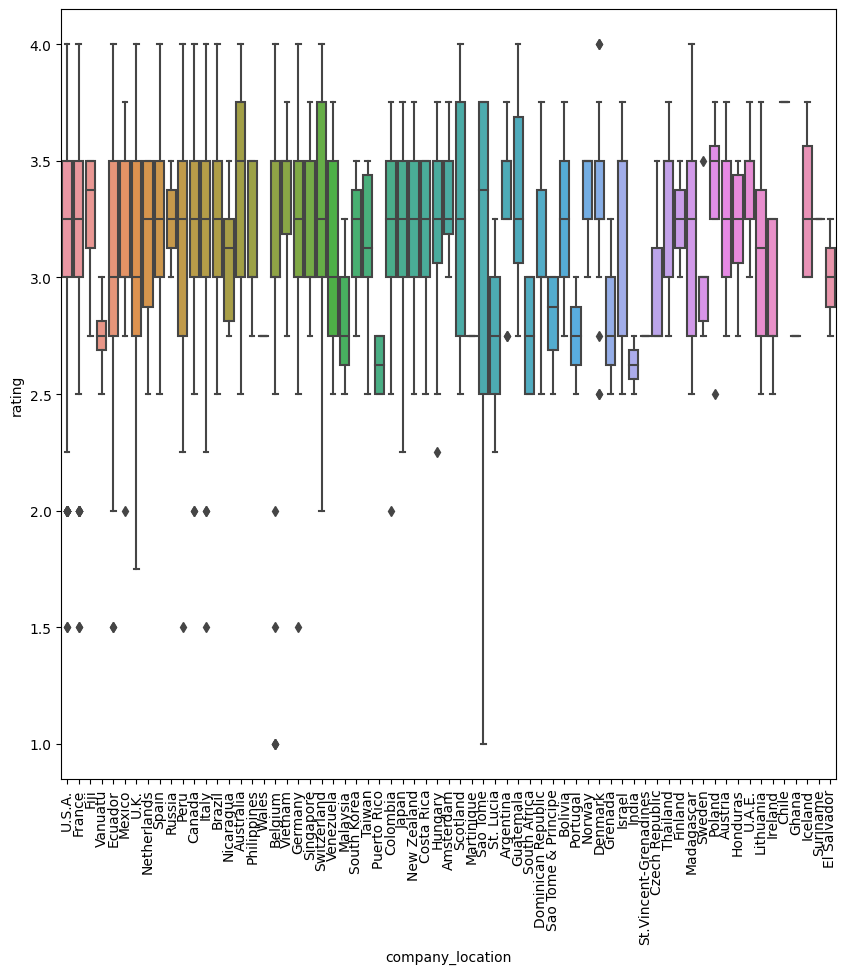

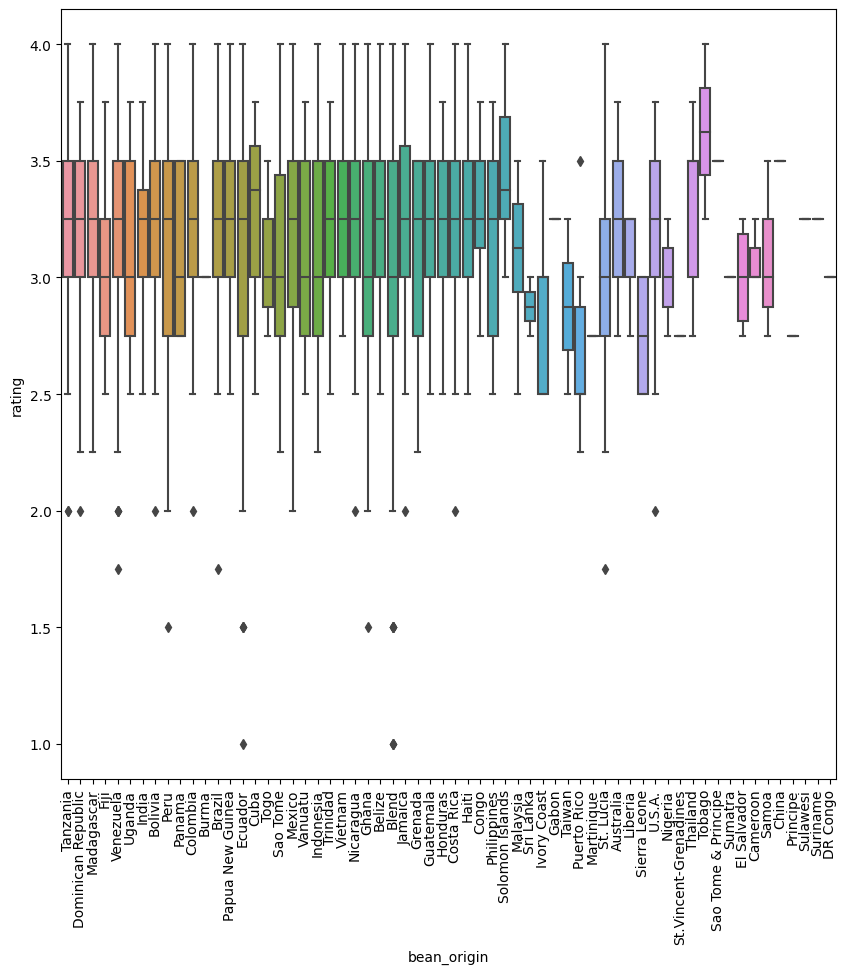

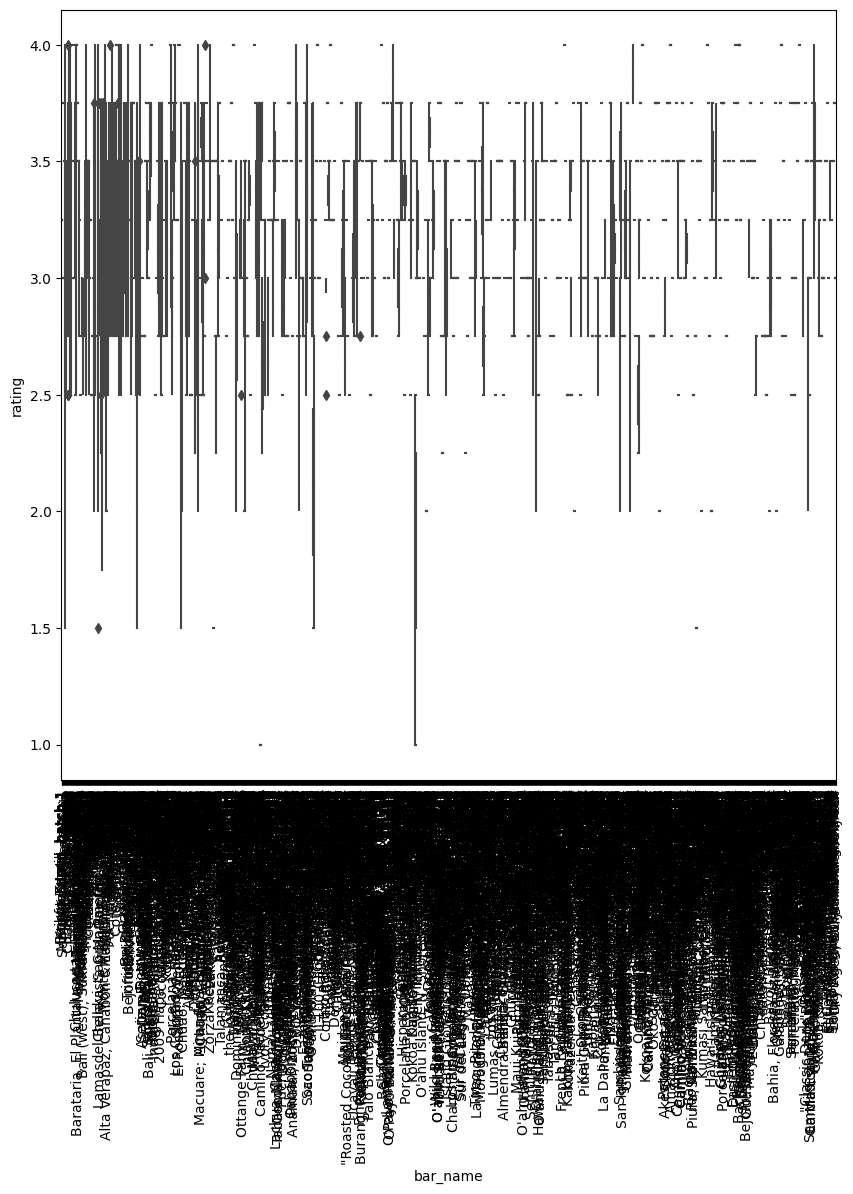

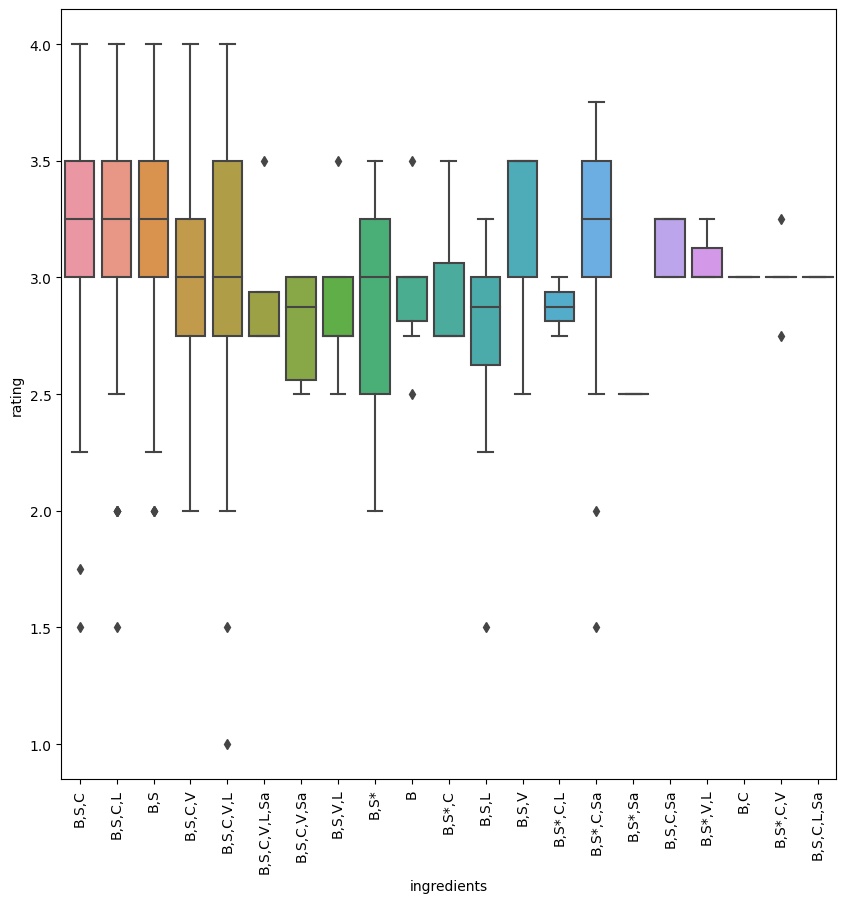

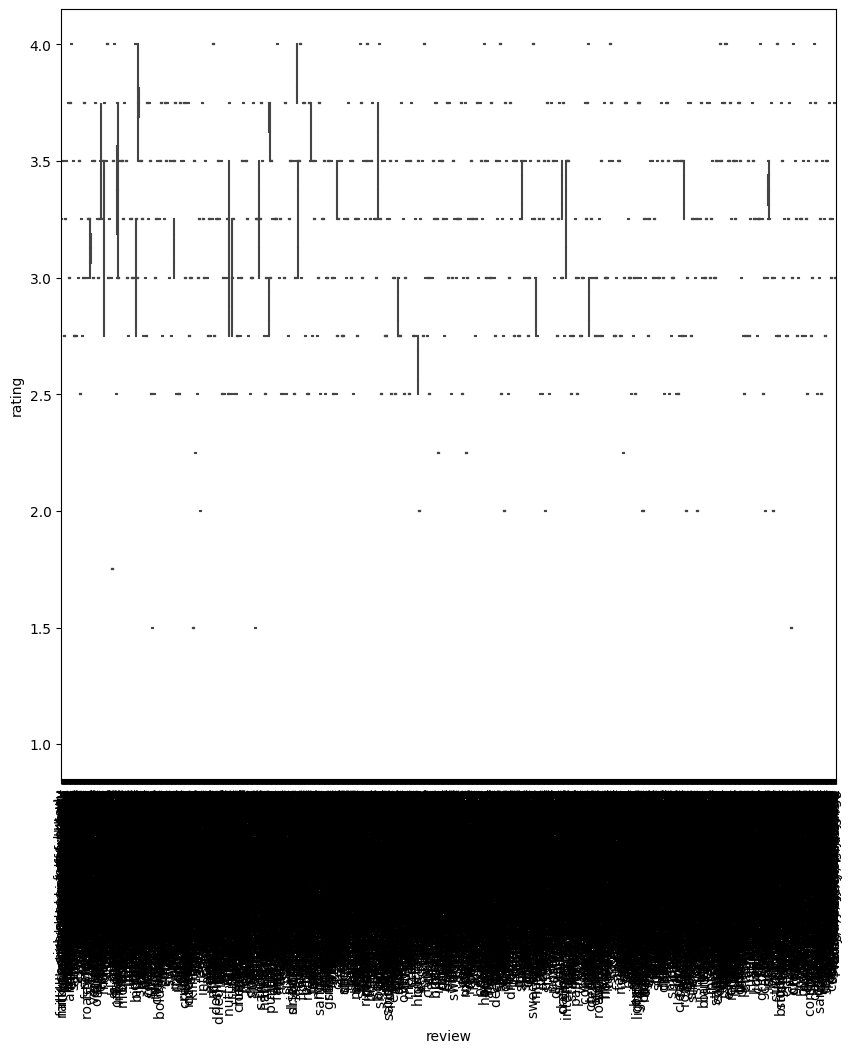

In [44]:
for col in dis_col:
    plt.figure(figsize=(10, 10))
    plt.xticks(rotation=90)
    sns.boxplot(x = df[col], y=df['rating'])
    plt.show()

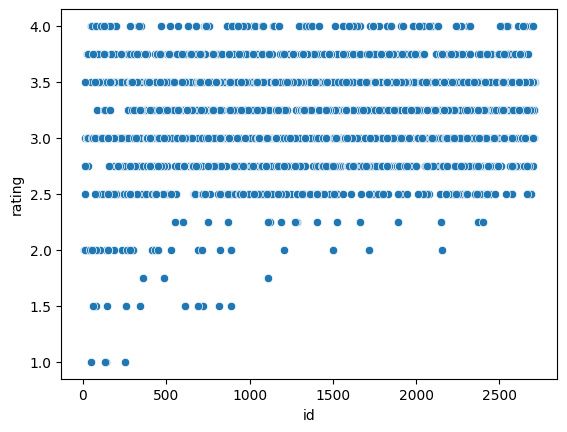

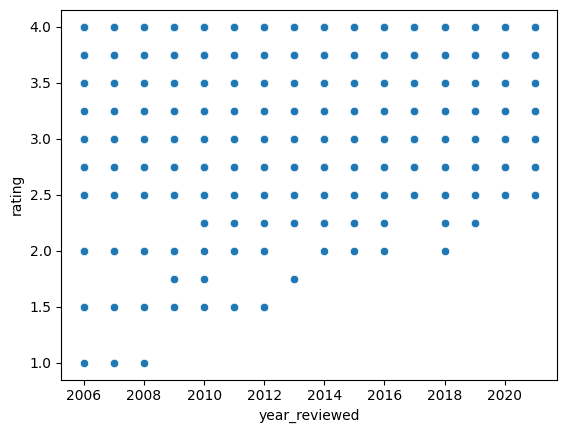

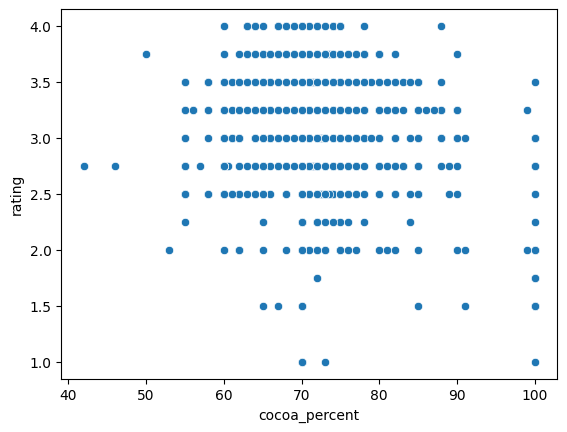

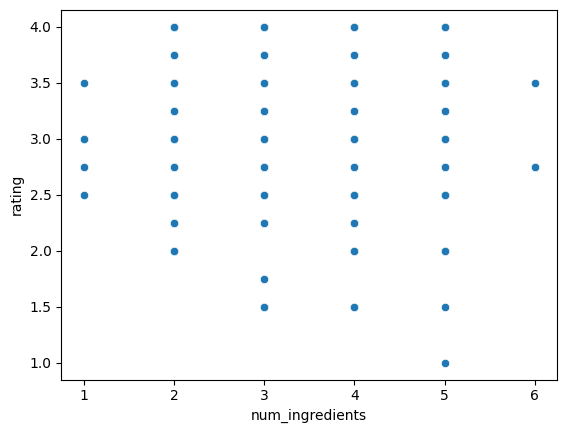

In [25]:
cont_col = cont_col.drop('rating')

for col in cont_col:
    sns.scatterplot(x = df[col], y=df['rating'])
    plt.show()

<AxesSubplot:>

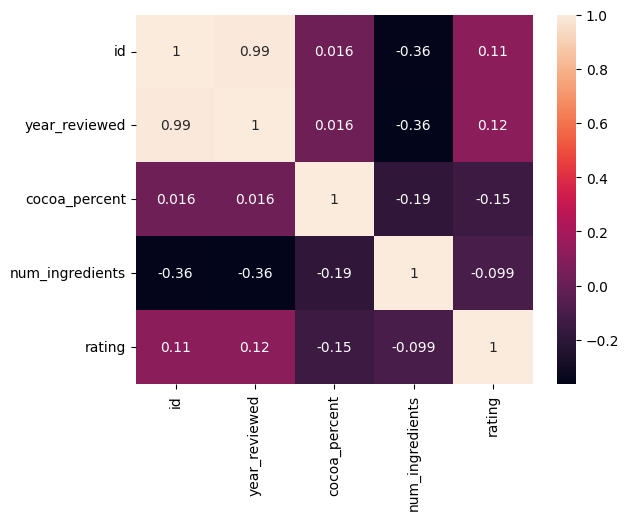

In [26]:
# Heatmap
#plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

### Note - since the results of the plots does not give very clear patterns the independent variables are further analized to check the value counts and number of unique entries

In [28]:
cols = df.columns
cols

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

In [30]:
for col in cols:
    n  = len(pd.unique(df[col]))
    print(f"Number of unique valus in column {col} - {n}") 

Number of unique valus in column id - 630
Number of unique valus in column manufacturer - 580
Number of unique valus in column company_location - 67
Number of unique valus in column year_reviewed - 16
Number of unique valus in column bean_origin - 62
Number of unique valus in column bar_name - 1605
Number of unique valus in column cocoa_percent - 46
Number of unique valus in column num_ingredients - 7
Number of unique valus in column ingredients - 22
Number of unique valus in column review - 2487
Number of unique valus in column rating - 12


In [33]:
df['id'].value_counts()

414     10
24       9
387      9
404      9
1450     8
        ..
597      1
853      1
855      1
849      1
1003     1
Name: id, Length: 630, dtype: int64

In [34]:
df['manufacturer'].value_counts()

Soma                                   56
Fresco                                 39
Arete                                  32
Bonnat                                 30
A. Morin                               26
                                       ..
Rancho San Jacinto                      1
Raoul Boulanger                         1
Raw Cocoa                               1
Heirloom Cacao Preservation (Mindo)     1
Manifesto Cacao                         1
Name: manufacturer, Length: 580, dtype: int64

In [35]:
df['company_location'].value_counts()

U.S.A.                   1136
Canada                    177
France                    176
U.K.                      133
Italy                      78
                         ... 
St.Vincent-Grenadines       1
Martinique                  1
Ghana                       1
Wales                       1
Suriname                    1
Name: company_location, Length: 67, dtype: int64

In [36]:
df['year_reviewed'].value_counts()

2015    284
2014    247
2018    228
2016    217
2012    194
2019    193
2013    183
2021    175
2011    163
2009    123
2010    110
2017    105
2008     92
2020     81
2007     73
2006     62
Name: year_reviewed, dtype: int64

In [37]:
df['bean_origin'].value_counts()

Venezuela                253
Peru                     244
Dominican Republic       226
Ecuador                  219
Madagascar               177
                        ... 
Sumatra                    1
St.Vincent-Grenadines      1
Martinique                 1
Burma                      1
DR Congo                   1
Name: bean_origin, Length: 62, dtype: int64

In [38]:
df['bar_name'].value_counts()

Madagascar                                             55
Ecuador                                                43
Peru                                                   41
Dominican Republic                                     38
Chuao                                                  28
                                                       ..
Semai Community, Kamping Long B, Pahang                 1
Burang, Popayato-Paquat microlot, Goranulo Province     1
Ottange Farm, Mava Plantation, Sambirano                1
Finca La Rioja E., Cacahoatan, Chiapas, microlot        1
Mountains of the Moon                                   1
Name: bar_name, Length: 1605, dtype: int64

In [39]:
df['num_ingredients'].value_counts()

3.0    1023
2.0     750
4.0     469
5.0     191
1.0       6
6.0       4
Name: num_ingredients, dtype: int64

In [40]:
df['ingredients'].value_counts()

B,S,C           999
B,S             718
B,S,C,L         286
B,S,C,V,L       184
B,S,C,V         141
B,S*             31
B,S*,C,Sa        20
B,S*,C           12
B,S,L             8
B,S*,C,V          7
B                 6
B,S,C,V,Sa        6
B,S,V,L           5
B,S,C,Sa          5
B,S,C,V,L,Sa      4
B,S,V             3
B,S*,V,L          3
B,S*,C,L          2
B,S*,Sa           1
B,C               1
B,S,C,L,Sa        1
Name: ingredients, dtype: int64

In [41]:
df['review'].value_counts()

spicy, cocoa                 4
creamy, nutty, cocoa         4
sandy, sweet, cocoa          3
cherry, rich choco           3
sweet, marshmallow           3
                            ..
earthy, floral, cocoa        1
simple, mild cocoa, fruit    1
spicy, sweet,                1
fruity, roasty               1
muted, roasty, accessible    1
Name: review, Length: 2487, dtype: int64

In [72]:
pd.unique(df['ingredients'])

array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', nan, 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L',
       'B,S,V', 'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa',
       'B,S*,V,L', 'B,C', 'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

In [51]:
pd.unique(df['rating'])

array([3.25, 3.5 , 3.75, 3.  , 2.75, 4.  , 2.5 , 1.75, 2.25, 1.5 , 2.  ,
       1.  ])

<AxesSubplot:xlabel='year_reviewed', ylabel='rating'>

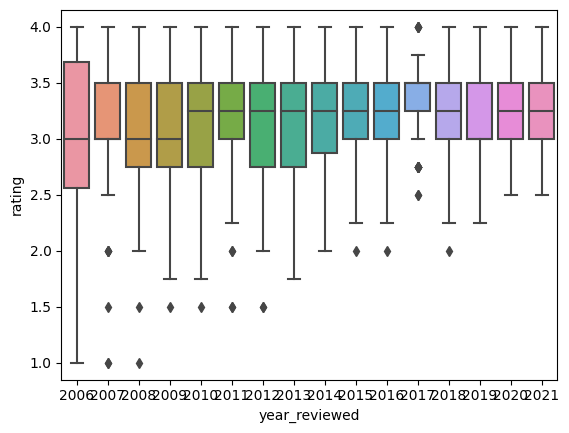

In [47]:
sns.boxplot(x = df['year_reviewed'], y=df['rating'])

<AxesSubplot:xlabel='id', ylabel='rating'>

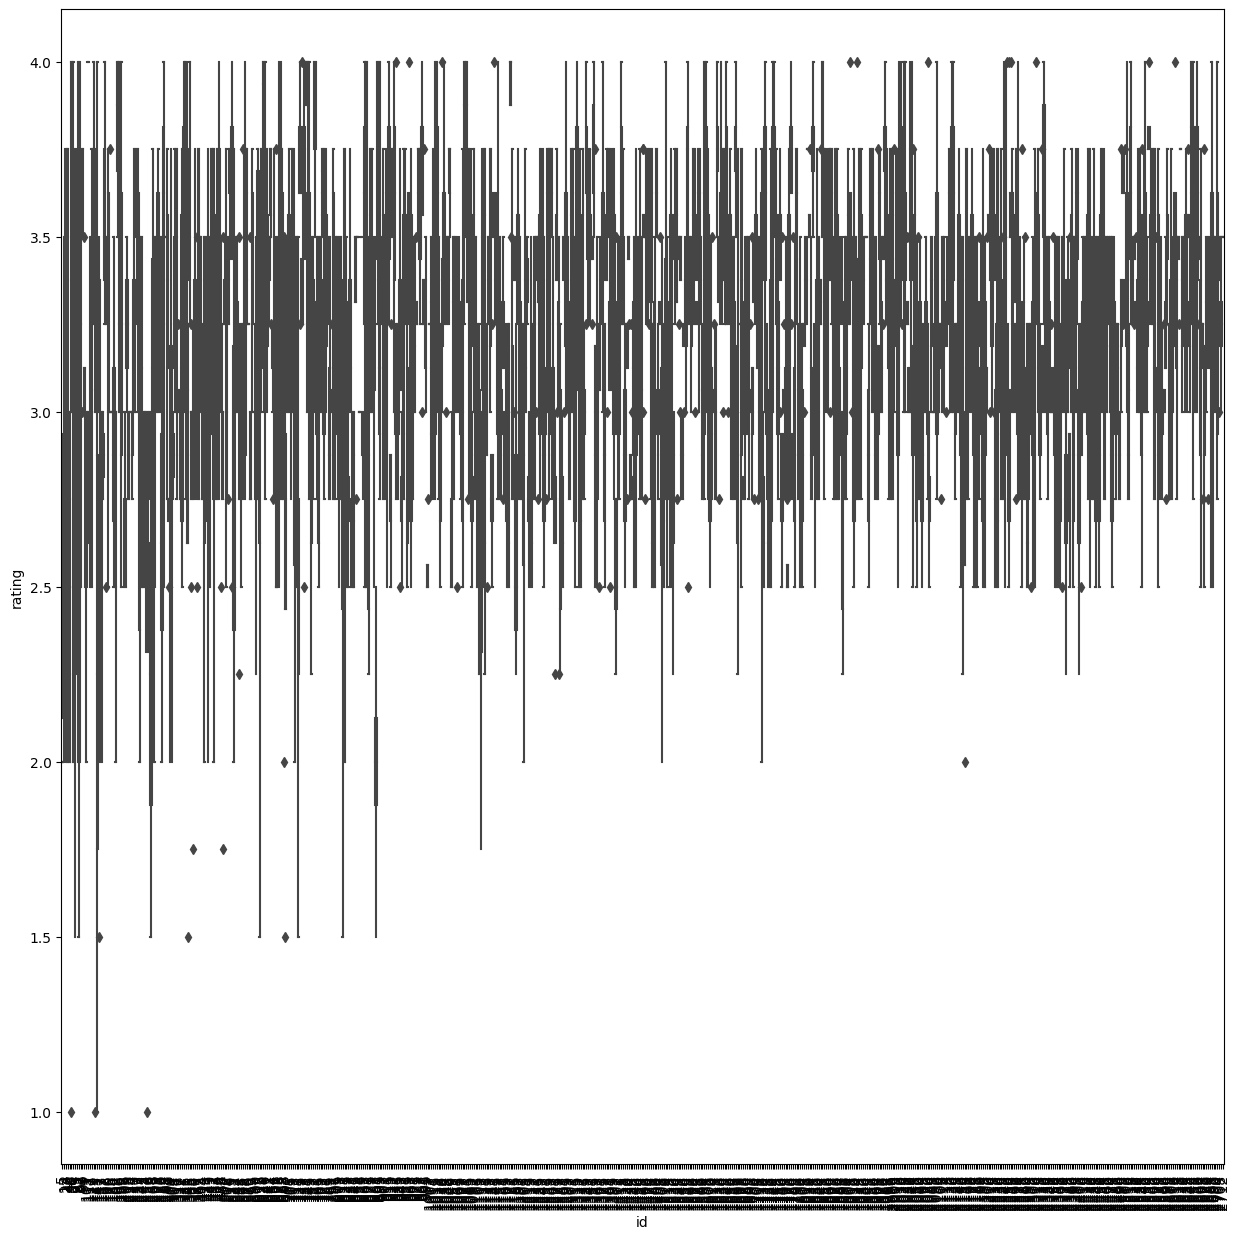

In [50]:
plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
sns.boxplot(x = df['id'], y=df['rating'])

# Feature selection
- By analysing the boxplots out of the discreate features in case of 'ingredients' we can observer a trend with respect to 'rating'. Chocolate bars with ingredents 'B,S,C', 'B,S,C,L', 'B,S' and 'B,S*,C,Sa' tends to have a higher mean rating compared to the ones with other types of ingredients.
- By analysing the scatterplots out of the continuous features in case of 'cocoa_percent' we can see a high correlation to the 'rating'. This can be seen from the pairplot as well.
- From the heatmap results we can see that 'id' and 'year_reviewed' are the only two variables that have some-what correlated to 'rating'
- But between 'id' and 'year_reviewed' there is a very high corelation thus only 'year_reviewed' was selected and the relationship between 'year_reviewed'and rating was further checked using the boxplot above. This boxplot does not show a imprtant trend between 'year_reviewed' and 'rating'. Thus 'year_reviewed' was not included in the final selected feature list.
- Selection of features to predict the rating:
    - ingredients
    - cocoa_percent

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


### Transfer categorical values to number
- `ingredients` is categorical values, thus will be converted to number
- Since 'B,S,C', 'B,S,C,L', 'B,S' and 'B,S*,C,Sa' are the significant ingredient types, all other ingredient label will be converted to 'ingredient_other'

In [74]:
ingredient_labels = df['ingredients'].unique()
ingredient_labels



array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', nan, 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L',
       'B,S,V', 'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa',
       'B,S*,V,L', 'B,C', 'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

In [76]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

### Since ingredients variable has missing values there will be fill with 'ingredient_other' value first and then the other ingredient types will be converted to 'ingredient_other'

In [88]:
df['ingredients'].fillna('ingredient_other', inplace=True)

In [89]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients          0
review               0
rating               0
dtype: int64

In [90]:
other_ingredient_labels = ['B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa','B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L',
       'B,S,V', 'B,S*,C,L', 'B,S*,Sa', 'B,S,C,Sa',
       'B,S*,V,L', 'B,C', 'B,S*,C,V', 'B,S,C,L,Sa']

for ingr in other_ingredient_labels:
    df['ingredients'].replace(ingr, 'ingredient_other', inplace = True)



In [91]:
ingredient_labels = df['ingredients'].unique()
ingredient_labels

array(['B,S,C', 'B,S,C,L', 'B,S', 'ingredient_other', 'B,S*,C,Sa'],
      dtype=object)

#### Transform 'ingredients' to numerical

In [92]:
df = pd.get_dummies(df, columns=['ingredients'], drop_first=True)

In [94]:
df.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients', 'review',
       'rating', 'ingredients_B,S*,C,Sa', 'ingredients_B,S,C',
       'ingredients_B,S,C,L', 'ingredients_ingredient_other'],
      dtype='object')

In [95]:
# Setting X and y
X = df[  ['cocoa_percent', 
        'ingredients_B,S*,C,Sa', 'ingredients_B,S,C',
       'ingredients_B,S,C,L', 'ingredients_ingredient_other']   ]

y = df['rating']

X.shape, y.shape


((2530, 5), (2530,))

## Test train split

In [96]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=999)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1771, 5), (759, 5), (1771,), (759,))

# Preprocessing / Cleaning

### Filling missing values 
- This was done earlier since I need to apply label encoding

In [97]:
X_train.isna().sum()

cocoa_percent                   0
ingredients_B,S*,C,Sa           0
ingredients_B,S,C               0
ingredients_B,S,C,L             0
ingredients_ingredient_other    0
dtype: int64

In [98]:
X_test.isna().sum()

cocoa_percent                   0
ingredients_B,S*,C,Sa           0
ingredients_B,S,C               0
ingredients_B,S,C,L             0
ingredients_ingredient_other    0
dtype: int64

In [99]:
y_train.isna().sum()

0

In [100]:
y_test.isna().sum()

0

### Standardize

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [105]:
X_train[1:5]

array([[-0.27461142, -0.08259575, -0.82092207, -0.35880973, -0.48921182],
       [-0.27461142, -0.08259575,  1.21814243, -0.35880973, -0.48921182],
       [-2.87882472, -0.08259575, -0.82092207,  2.78699242, -0.48921182],
       [ 1.02749522, -0.08259575, -0.82092207, -0.35880973, -0.48921182]])

In [106]:
y_train[1:5]

2055    3.00
934     3.75
1339    3.25
2309    3.25
Name: rating, dtype: float64

# Modeling

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(n_jobs=-1)
lr = LinearRegression()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True)

models = [lr, rf]
scores = []

for model in models:
    scores.append(
        cross_val_score(model, X_train, y_train, cv=kf, 
                         scoring='r2')
                  )

print(scores)

[array([0.0681288 , 0.10943602, 0.0432824 , 0.10185109, 0.0625976 ]), array([ 0.0551355 ,  0.07576722, -0.00623109,  0.14433565,  0.02459735])]


In [112]:
print(np.mean(scores, axis=1))

[0.07705918 0.05872093]


### Note out of the two models tested Linear regression has a better R squared value. Thus it is selected as the best model.

In [117]:
#1. import the library
from sklearn.model_selection import GridSearchCV
#RandomSearchCV is a faster version

#2. define the search space
#is a dictionary: key(param): value(value)
#go to google and search sklearn RandomForestRegressor, see how many parameters
#what is the idea: no idea - just loop everything
param_grid = {
}
#how many combinations? --> 24 combinations

#3. define the model you want to search with
estimator = LinearRegression()

#4. define the gridsearch object with the search space
grid = GridSearchCV(estimator  = estimator,
                    param_grid = param_grid,
                    cv = 5,  #by default, it uses kfold anyway; 5 here means 5 fold
                    n_jobs  = -1,
                    refit   = True, #refits means, after 24 loops, it will fit the best version again!, so grid = best model
                    scoring = 'neg_mean_squared_error',
                    return_train_score=True)

#5. run the search
grid.fit(X_train, y_train)  #why training set???

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             return_train_score=True, scoring='neg_mean_squared_error')

# Testing

In [118]:
from sklearn.metrics import accuracy_score, classification_report

yhat = grid.predict(X_test)

In [124]:
grid.score(X_test, y_test)

-0.1879292102171289

### Result is not a very good accuracy score

# Feature importance

In [127]:
grid.best_estimator_.coef_

array([-0.06820096, -0.02403936,  0.02362708, -0.01212151, -0.1010009 ])

<BarContainer object of 5 artists>

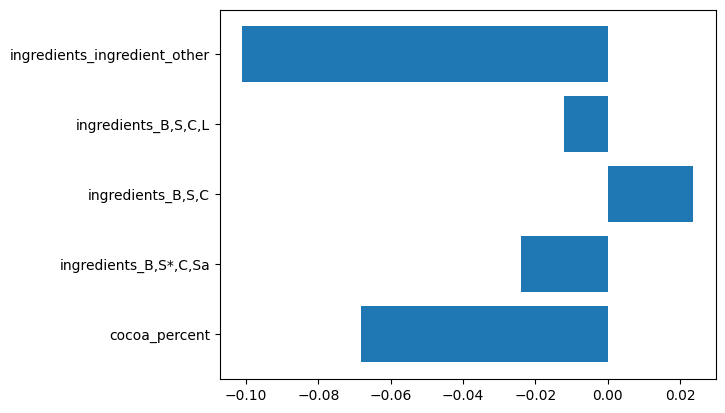

In [128]:
feature_names = ['cocoa_percent', 
        'ingredients_B,S*,C,Sa', 'ingredients_B,S,C',
       'ingredients_B,S,C,L', 'ingredients_ingredient_other']

plt.barh(feature_names, grid.best_estimator_.coef_)

# Save models

In [129]:
#import pickle
import pickle

#set the filename
filename = 'chocolate_bar_rating.pkl' 

#dump the file 

pickle.dump(grid, open(filename, 'wb'))

#i can show you how to load the model
loaded_model = pickle.load(open(filename, 'rb'))